# Aula 05 - Identificação e Extração de Texto

# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Identificação e Extração de Texto </font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

## Conteúdo
- OCR
   - Imagens
   - Arquivos PDF
- Expressões Regulares

**IMPORTANTE**: As imagens e arquivos PDF empregados neste notebook, nos exercícios e na avaliação estão contidos no arquivo
<font style="font-family: monaco">arquivos de apoio.zip</font>.
Você deve descompactar o ZIP e mover os arquivos gerados para o mesmo diretório onde os notebooks estão sendo executados.

## <font color='blue'>OCR</font>
Optical Character Recognition (OCR) é o processo de identificar e extrair textos (no formato "ascii") que estejam contidos em imagens. 

$$
\fbox{Imagem} \Longrightarrow \fbox{Texto (String)}
$$

Existem vários pacotes disponíveis para python dedicados a tal tarefa:
- **pytesseract**
- **pyocr**
- **textract**

A maior parte destes pacotes são "wrappers" em Python da biblioteca Tesseract-OCR. Em particular, <font color='blue'>pytesseract</font> tem ganhado muita atenção nos últimos anos, incorporando soluções baseadas em deep learning que melhoram muito a qualidade dos resultados quando comparados aos de outros pacotes.

O pacote <font color='blue'>pytesseract</font> não faz parte da instalação padrão do Anaconda, e deve ser instalado separadamente. Para realizar a instalação é necessário primeiro instalar a biblioteca <font color='blue'>tesseract</font> (não é uma biblioteca python). As instruções de instalação desta biblioteca podem ser encontradas  [aqui](https://anaconda.org/conda-forge/tesseract) (assumindo que sua instalação do Python é via Anaconda). 

A instalação Anaconda vem com suporte à **língua portuguesa**. Após instalar a biblioteca <font color='blue'>tesseract</font> execute o comando abaixo (assumindo que sua instalação do Python é via Anaconda)
```os
conda install -c conda-forge pytesseract 
```
para instalar o "wrapper" python para <font color='blue'>tesseract</font>.

**RECOMENDAÇÃO MUITO IMPORTANTE**: Para este módulo do curso, recomendamos fortemente utilizar o **Colab** do Google para rodar os notebooks. Para instalar o <font color='blue'>tesseract</font> no Colab basta rodar a célula abaixo.

Se você tiver dificuldade com a instalação, peça ajuda aos monitores.

---

In [2]:
# Instalando as bibliotecas necessárias para este módulo no Colab

#!apt install tesseract-ocr
#!apt install tesseract-ocr-por
#!apt install libtesseract-dev
#!apt install poppler-utils
#!pip install pytesseract
#!pip install pdf2image

### OCR em Imagens
Em geral, o procedimento de extração de texto demanda etapas de pré-processamento, que vão desde a leitura de documentos até mudanças de representação do sistema de cor. 

A primeira tarefa é carregar a imagem que será processada. Utilizaremos o pacote <font color='blue'>PIL</font> para este fim. A escolha do pacote <font color='blue'>PIL</font> se justifica pelo fato do pacote OCR <font color='blue'>pytesseract</font> (que será utilizado em nossos exemplos) trabalhar com objetos gerados pelo <font color='blue'>PIL</font>.

Uma vez que a imagem tenha sido carregada, a utilização do <font color='blue'>pytesseract</font> se resume a enviar a imagem como argumento e receber uma string como resposta.

#### Qualidade do Resultado
A qualidade do resultado produzido pelo <font color='blue'>pytesseract</font> está diretamente relacionanda com as propriedades da imagem enviada como argumento. Considere a imagem
<img src="arquivos de apoio/imagem_test1.png" alt="drawing" width="200"/>
Vamos utilizar o <font color='blue'>pytesseract</font> para extrair o texto contido nesta imagem.

In [3]:
import pytesseract as ocr
from PIL import Image

phrase = ocr.image_to_string(Image.open('arquivos de apoio/imagem_test1.png'), lang='por')
print(phrase)

Para a imagem `imagem_test1.png`, o OCR não deve ter sido capaz de detectar e extrair o texto _"Texto para ser extraido"_. Considere agora a imagem abaixo, que é a mesma do exemplo anterior, porém com a posição do texto deslocada para baixo:
<img src="arquivos de apoio/imagem_test2.png" alt="drawing" width="200"/>

In [4]:
phrase = ocr.image_to_string(Image.open('arquivos de apoio/imagem_test2.png'), lang='por')
print(phrase)

Texto para ser extraido

 



Note que para a imagem `imagem_test2.png` o texto foi perfeitamente extraído. A razão é que o contraste entre o fundo e o texto fica mais acentuado quando o texto foi deslocado para a região mais "clara" da imagem.

Vejamos outros exemplos:

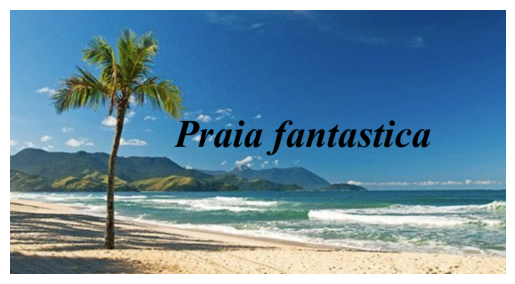

Texto extraido:   



In [5]:
import matplotlib.pyplot as plt

im = Image.open("arquivos de apoio/imagem_test3.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # como o contraste entre a imagem e o fundo não é grande
                                 # o OCR não consegue extrair corretamente a frase "praia fantastica"

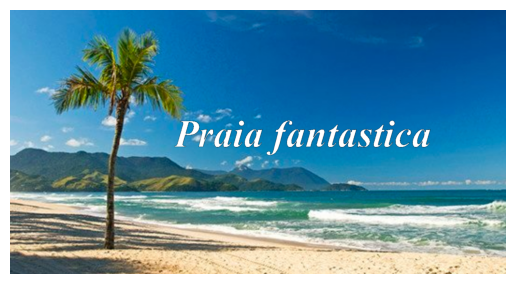

Texto extraido:  3 j |
15 W

 

GRITAR ROLL AR VT

 



In [6]:
im = Image.open("arquivos de apoio/imagem_test4.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # mudando o contraste entre a imagem e o fundo 
                                 # o OCR consegue extrair corretamente a frase 
                                 # "praia fantastica", mas alguns caracteres indesajados 
                                 # são obtidos

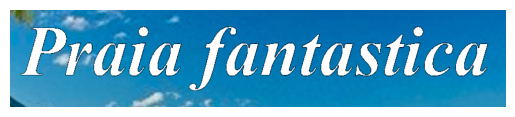

Texto extraido:  Práia fantastica



In [7]:
im = Image.open("arquivos de apoio/imagem_test5.png")
plt.axis('off')
plt.imshow(im)
plt.show()

phrase = ocr.image_to_string(im, lang='por')
print('Texto extraido: ',phrase) # recortando da imagem apenas o pedaço que contém a fase
                                 # o OCR tem um desempenho melhor

Recortando a parte da imagem que contém o texto resulta em uma extração de muito melhor qualidade. 

Os exemplos acima mostram que as propriedades da imagem onde o texto está inserido impactam drasticamente na qualidade do resultado do OCR.

Existe um conjunto de recomendações para que se obtenha resultados satisfatórios com o OCR:

1. Deve-se sempre utilizar imagens em tons de cinza ao invés de imagens coloridas
2. Remover ruídos da imagem
3. Manter uma resolução de 300dpi
4. Manter o texto alinhado na horizontal
5. Os caracteres do texto a ser extraído devem ter pelo menos 10 pixels de altura
6. O texto a ser extraído deve estar em uma única língua
7. Sempre que possível recortar o pedaço da imagem onde o texto está inserido

O <font color='blue'>tesseract</font> aplica técnicas de processamento de imagens internamente a fim de satisfazer as recomendações acima, porém, nem sempre o resultado é satisfatório. Desta forma, um pré-processamento manual pode ser necessário. 

Quando uma quantidade grande de imagens precisa ser processada, o ideal é que se estabeleça um protocolo que garanta as recomendações acima para todas as imagens na base, como por exemplo, seguir um padrão para digitalização de documentos, controlando iluminação na captura de imagens, etc.

### OCR em arquivos PDF 

Um procedimento bastante comum para ser extrair texto de arquivos PDF é primeiro converter o arquivo PDF em uma imagem, aplicando o OCR na imagem resultante. 

Exitem alguns pacotes python para converter arquivos PDF em imagens, sendo o <font color='blue'>wand</font> e <font color='blue'> pdf2image </font> os mais utilizados. Iremos utilizar  <font color='blue'> pdf2image</font>, que também não é um pacote nativo do Python. De fato, o pacote <font color='blue'> pdf2image </font> é um wrapper python para a biblioteca <font color='blue'>poppler</font>, que precisa ser instalada manualmente, como foi feito com o <font color='blue'>tesseract</font>. Detalhes de como realizar a instalação podem ser encontrados [aqui](https://pypi.org/project/pdf2image/) e [aqui](https://pdf2image.readthedocs.io/en/latest/). Uma vez instalada a biblioteca, execute o comando:
```os
conda install -c conda-forge pdf2image
```
para instalar o wrapper <font color='blue'> pdf2image </font> para python, 

#### pdf2image
A conversão de arquivos PDF para imagem é feita de modo que cada página do arquivo se torne uma imagem.

$$
\fbox{PDF}\Longrightarrow\fbox{Imagem}\Longrightarrow\fbox{Texto}
$$

In [8]:
# Convertendo as páginas do arquivo PDF 'pdf_test.pdf' em imagens

import os
from PIL import Image 
import pytesseract 
from pdf2image import convert_from_path 

# Carrega o PDF e armazenas todas as páginas separadamente
# na variável
imagem_paginas = convert_from_path('arquivos de apoio/pdf_test.pdf') 

# Voce precisa criar um diretorio chamado "paginas"
# na mesma pasta onde este notebook esta armazenado

# Criando diretorio onde iremos salvar as paginas
# Checar se existe o diretorio
directory = "paginas"
if not os.path.exists(directory):
    # If it doesn't exist, create it
    os.makedirs(directory)

# Salvando cada imagem das páginas em um arquivo
for i,pagina in enumerate(imagem_paginas): 
    # PDF pagina 1 -> pagina_1.png  
    # PDF pagina 2 -> pagina_2.png  
    # .... 
    filename = "paginas/pagina_"+str(i)+".png"
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',filename)
    pagina.save(filename, 'PNG') 

Gravando pagina:  paginas/pagina_0.png
Gravando pagina:  paginas/pagina_1.png


In [9]:
# utilizando OCR para extrair o texto das imagens das paginas do aquivo PDF
import pytesseract as ocr
from PIL import Image
import glob  

files = glob.glob("paginas/*")

texto = []
for filename in files:
    t = ocr.image_to_string(Image.open(filename), lang='por')
    texto.append(t)

for i,t in enumerate(texto):
    print(5*'**','Texto da pagina ',i,5*'**','\n')
    print(texto[i])

********** Texto da pagina  0 ********** 

Falta de Gas em São Carlos

Muitos leitores entraram em contato com o whatsapp do SCA reclamando da falta de gás
em distribuidoras de gás de cozinha na cidade. Está muito difícil de achar o botijão GLP de
13 kg.

O SCA entrou em contato com algumas revendedoras e a resposta é que não havia o
produto para entregar e não há previsão de chegada. Em um estabelecimento chegaram 10
botijões que foram vendidos rapidamente para pessoas que estavam aguardando na fila na
frente do depósito.

A falta de gás se deve a grande procura do produto por causa da pandemia de coronavírus
e os consumidores estão estocando desnecessariamente botijões. Outro fator é que
aumentou o consumo, já que muitas pessoas estão comendo em casa, gastando mais gás,
devido as medidas de distanciamento social.

Leia mais em:
https://www.saocarlosagora.com.br/cidade/falta-gas-de-cozinha-em-sao-carlos/124785/

********** Texto da pagina  1 ********** 

Corona em São Carlos

A Vigil

### Outras alternativas ###
O procedimento descrito acima para extrair texto de documentos PDF é bastante geral e funciona bem na maioria dos casos. Porém, existem pacotes Python capazes de extrair o texto de arquivos PDF sem a necessidade da pré-conversão das páginas para imagem. Dentre tais pacotes destacam-se:

- PDFPlumber
- PyMuPDF
- PDFMiner

A qualidade do texto extraído por tais pacotes depende de como o PDF foi gerado. Não entraremos em detalhes sobre tais pacotes, mas fica aqui a dica.

## <font color='blue'>Expressões Regulares</font>
Uma expressão regular é uma sequência de caracteres que segue um padrão específico. Por exemplo, o CPF das pessoas segue um padrão de caracteres específico, com o formato:
```os
ddd.ddd.ddd-dd
```
onde 'd' é um dígito [0-9]. Outro exemplo é a numeração de placas de veículos, que, com o padrão Mercosul, passou a ter o formato:
```os
wwwdwdd
```
onde 'w' é um caracter do alfabeto [A-Z] e 'd' um dígito numérico [0-9].

Muitas aplicações de identificação de texto envolvem a questão de procurar por padrões específicos em um bloco de texto.

### O pacote <font color='blue'> re </font> (regex)
O pacote de expressões regulares do python, chamado <font color='blue'>regex</font> e denominado <font color='blue'> re</font>, é uma poderosa ferramenta para identificar e extrair padrões como sequências de caracteres a partir de strings. Os métodos do pacote <font color='blue'> re </font> utilizam uma simbologia para representar as expressões regulares, permitindo a realização de buscas bastante complexas. Vejamos alguns exemplos da simbologia utilizada e seu funcionamento.

In [10]:
import re

#### símbolo <font color='blue'>*</font>
O símbolo '*' permite encontrar zero ou mais ocorrências de uma sequência 
de caracteres que precedem o símbolo.

In [11]:
texto = 'O pacote RE é complicado no começo mas é só no commmeço'


print(re.findall('com*',texto)) # busca todas as ocorrências da 
                                # sequência 'co' seguida ou não da letra
                                # 'm', não importando o número de vezes
                                # que 'm' ocorra

['co', 'com', 'com', 'commm']


#### símbolo <font color='blue'>[ ] </font>
O símbolo '[ ]' permite encontrar qualquer um dos caracteres que aparece 
no conjunto

In [12]:
texto = 'O pacote RE é complicado no começo, mas é coisa rápida conhecer'

print(re.findall('co[tm]',texto)) # encontra todas as ocorrências 
                                  # de 'co' seguidas de 't' ou 'm'
    
    
print(re.findall('co[tm]*',texto)) # quando combinado com *, econtra as ocorrências
                                   # de 'co' mesmo que não sejam
                                   # seguidas de 't' ou 'm'

['cot', 'com', 'com']
['cot', 'com', 'com', 'co', 'co']


#### símbolo <font color='blue'> + </font>
O símbolo '+' é quivalente ao símbolo '*', porém, pelo menos uma ocorrência do caractere (ou conjunto de caracteres) que precede o símbolo deve aparecer.

In [13]:
texto = 'Nesta sequência várias vezes apareceriam ia,'
texto += ' mas quantas seriammm? ia sozinho só vai aparecer ' 
texto += 'quando * for usado'

print(re.findall('ia[,m]',texto)) # busca a sequência 'ia' seguida 
                                  # de ',' ou 'm'  
    
print(re.findall('ia[,m]+',texto)) # com o '+' multiplas ocorrências
                                  # de ',' ou 'm' são válidas
    
print(re.findall('ia[,m]*',texto)) # com o '*' multiplas ocorrências
                                  # de ',' ou 'm' também são válidas
                                

['iam', 'ia,', 'iam']
['iam', 'ia,', 'iammm']
['ia', 'ia', 'iam', 'ia,', 'iammm', 'ia']


#### símbolos <font color='blue'> \d \w </font>
O símbolo '\d' corresponde aos dígitos [0-9] e '\w' significa qualquer caractere alfanumérico [a-zA-Z0-9].

In [14]:
texto = 'Nesta sequência várias vezes apareceriam ia, '
texto += 'mas ia0 aparece somente uma vez'

print(re.findall('ia[a-zA-Z]',texto)) # 'ia' seguido que qualquer letra do alfabeto
print(re.findall('ia\w',texto)) # 'ia' seguido que qualquer caractere alfanumérico

['ias', 'iam']
['ias', 'iam', 'ia0']


In [15]:
texto = 'afde 86,87 asdf178,2324  45432,asg 1235'

# encontrando uma sequência de dois dígitos seguidos por vírgula
print(re.findall('\d\d,',texto))

# encontrando qualquer número com dois ou mais dígitos seguidos por vírgula
print(re.findall('[\d]+,',texto))

['86,', '78,', '32,']
['86,', '178,', '45432,']


Existem muitos outros símbolos que podem ser utilizados. Outros métodos de busca como <font color='blue'>search()</font>, <font color='blue'>sub()</font>, dentre outros, também estão disponíveis no pacote <font color='blue'>re</font>.


Mais detalhes sobre o pacote <font color='blue'> re </font> pode ser encontrado [aqui](https://www.w3schools.com/python/python_regex.asp) ou [aqui](https://docs.python.org/3/library/re.html).